# Data retrieval

In [9]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline

In [10]:
url = 'https://inshorts.com/en/read/sports'

In [11]:
news_data = []

In [12]:
news_category = url.split('/')
news_category

['https:', '', 'inshorts.com', 'en', 'read', 'sports']

In [13]:
news_category = news_category[-1]

In [14]:
data = requests.get(url)
data.content

b'<!doctype html><html lang="en"><head><meta charset="utf-8"/><title>Short English & Hindi News|Latest News, India News, Current Affairs|Inshorts</title><link rel="dns-prefetch" href="https://ajax.googleapis.com"><link rel="dns-prefetch" href="https://assets.inshorts.com"><link rel="dns-prefetch" href="https://static.inshorts.com"><link rel="dns-prefetch" href="https://cdn.ampproject.org"><meta name="theme-color" content="#ffffff"><link rel="shortcut icon" href="/assets/images/favicon.png" type="image/x-icon"/><meta http-equiv="Content-Type" content="text/html; charset=UTF-8"/><meta name="viewport" content="width=device-width,initial-scale=1"/><meta http-equiv="X-UA-Compatible" content="IE=edge"/><link rel="icon" sizes="192x192" href="/assets/images/logo_192.png"/><link href="https://inshorts.com" rel="canonical" />\n    <link href="https://inshorts.com" rel="alternate"/>\n    <meta name="description" content="read latest news with inshorts in less than 60 words related to business spo

In [15]:
soup = BeautifulSoup(data.content, 'html.parser')

In [16]:
headlines = soup.find_all('span', attrs={'itemprop': 'headline'})
articles = soup.find_all('div', attrs={'itemprop': 'articleBody'})

# Extract data into a list of dictionaries
news_articles = [{'news_headline': headline.get_text(strip=True),
                  'news_article': article.get_text(strip=True),
                  'news_category': 'Technology'}  # You can specify the category as needed
                 for headline, article in zip(headlines, articles)]

In [17]:
news_data.extend(news_articles)
news_data

[{'news_headline': "Australia drop to bottom of World Cup 2023 points table after Afghanistan's historic win",
  'news_article': 'Five-time champions Australia have dropped to the bottom of the ODI World Cup 2023 points table after Afghanistan registered a historic win against England in the tournament on Sunday. Afghanistan have jumped to the sixth position with two points and a net run-rate of -0.652. England are placed fifth, while hosts India are on top of the table.',
  'news_category': 'Technology'},
 {'news_headline': 'Afghanistan outplayed England in every department: Irfan Pathan',
  'news_article': 'Reacting to Afghanistan defeating England by 69 runs in ODI World Cup 2023, former India all-rounder Irfan Pathan tweeted, "Bahot mubarak Apko Afghanistan (Congratulations to Afghanistan)." "You outplayed England in every department," he added. Irfan also praised their bowling performance, writing, "Bowling has been top-notch from Afghans."',
  'news_category': 'Technology'},
 {'n

In [18]:
df = pd.DataFrame(news_data)

In [19]:
df = df[['news_headline', 'news_article', 'news_category']]

In [20]:
df.head(3)

,news_headline,news_article,news_category
0,Australia drop to bottom of World Cup 2023 poi...,Five-time champions Australia have dropped to ...,Technology
1,Afghanistan outplayed England in every departm...,Reacting to Afghanistan defeating England by 6...,Technology
2,Hope you're ok Vaughan: Jaffer after Afghanist...,After Afghanistan defeated England in the ODI ...,Technology


# Prepare user defined function to extract data from inshorts.com

In [21]:
urls_list = ['https://inshorts.com/en/read/technology',
             'https://inshorts.com/en/read/sports',
             'https://inshorts.com/en/read/world']

In [22]:
def datasetPrepare(urls_list):
    news_data = []
    for url in urls_list:
        news_category = url.split('/')[-1]
        print(news_category)
        data = requests.get(url)
        soup = BeautifulSoup(data.content, 'html.parser')
        headlines = soup.find_all('span', attrs={'itemprop': 'headline'})
        articles = soup.find_all('div', attrs={'itemprop': 'articleBody'})

# Extract data into a list of dictionaries
        news_articles = [{'news_headline': headline.get_text(strip=True),
                  'news_article': article.get_text(strip=True),
                  'news_category': news_category}  # You can specify the category as needed
                 for headline, article in zip(headlines, articles)]
        news_data.extend(news_articles) 
        df =  pd.DataFrame(news_data)
        df = df[['news_headline', 'news_article', 'news_category']]
    return df    

In [23]:
news_df = datasetPrepare(urls_list)

technology
sports
world


In [24]:
news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   news_headline  30 non-null     object
 1   news_article   30 non-null     object
 2   news_category  30 non-null     object
dtypes: object(3)
memory usage: 848.0+ bytes


In [25]:
news_df.tail(5)

,news_headline,news_article,news_category
25,Dubai-Amritsar flight diverted to Karachi due ...,A Dubai-Amritsar Air India flight was diverted...,world
26,Canada PM Trudeau issues statement on Navratri...,Canada PM Justin Trudeau issued a statement sa...,world
27,Iranian minister meets Hamas head amid Israel ...,Iran's Foreign Minister Hossein Amirabdollahia...,world
28,Not interested in war with Hezbollah: Israel,Israel's defence minister Yoav Gallant on Sund...,world
29,Israelis have turned on water pipes in souther...,White House National Security Adviser Jake Sul...,world


# Text Wrangling and Pre-processing

In [37]:
import spacy
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
import re
import unicodedata
import os
from nltk.corpus import stopwords
from textstat import syllable_count
from nltk.stem import WordNetLemmatizer

In [29]:

# Sample text
text = "This is a sample text with some complex words in it like starving and infiltration."

# Split the text into words
words = text.split()

# Calculate the number of complex words (words with more than 2 syllables)
complex_word_count = sum(1 for word in words if syllable_count(word) > 2)

print("Number of complex words:", complex_word_count)


Number of complex words: 1


In [30]:
tokenizer = ToktokTokenizer()
stopword_list = nltk.corpus.stopwords.words('english')
stopword_list.remove('no') 
stopword_list.remove('not')

## Remove HTML tags

In [31]:
def strip_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    stripped_text = soup.get_text()
    return stripped_text

strip_html_tags('<html><h2>Some important text</h2></html>')

'Some important text'

## Remove accented characters

In [32]:
def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

remove_accented_chars('Sómě Áccěntěd těxt')

'Some Accented text'

## Remove special characters

In [33]:
def remove_special_characters(text, remove_digits=False):
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text = re.sub(pattern, '', text)
    return text

In [34]:
remove_special_characters("Well this was fun! What do you think? 123#@!", remove_digits=True)

'Well this was fun What do you think '

## Text lemmatization

In [38]:
def lemmatize_text(text):
    # Tokenize the text into words
    words = word_tokenize(text)

    # Create a WordNet lemmatizer object
    lemmatizer = WordNetLemmatizer()

    # Perform lemmatization and join the results
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    lemmatized_text = ' '.join(lemmatized_words)

    return lemmatized_text


In [39]:
lemmatize_text("My system keeps crashing! his crashed yesterday, ours crashes daily")

'My system keep crashing ! his crashed yesterday , ours crash daily'

## Text stemming

In [40]:
def simple_stemmer(text):
    ps = nltk.porter.PorterStemmer()
    text = ' '.join([ps.stem(word) for word in text.split()])
    return text

simple_stemmer("My system keeps crashing his crashed yesterday, ours crashes daily")

'my system keep crash hi crash yesterday, our crash daili'

## Remove stopwords

In [42]:
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

remove_stopwords("The, and, if are stopwords, computer is not")

', , stopwords , computer not'

## Building a text normalizer

In [43]:
def normalize_corpus(corpus, html_stripping=True, contraction_expansion=True,
                     accented_char_removal=True, text_lower_case=True, 
                     text_lemmatization=True, special_char_removal=True, 
                     stopword_removal=True, remove_digits=True):
    
    normalized_corpus = []
    # normalize each document in the corpus
    for doc in corpus:
        # strip HTML
        if html_stripping:
            doc = strip_html_tags(doc)
        # remove accented characters
        if accented_char_removal:
            doc = remove_accented_chars(doc)
        # lowercase the text    
        if text_lower_case:
            doc = doc.lower()
        # remove extra newlines
        doc = re.sub(r'[\r|\n|\r\n]+', ' ',doc)
        # lemmatize text
        if text_lemmatization:
            doc = lemmatize_text(doc)
        # remove special characters and\or digits    
        if special_char_removal:
            # insert spaces between special characters to isolate them    
            special_char_pattern = re.compile(r'([{.(-)!}])')
            doc = special_char_pattern.sub(" \\1 ", doc)
            doc = remove_special_characters(doc, remove_digits=remove_digits)  
        # remove extra whitespace
        doc = re.sub(' +', ' ', doc)
        # remove stopwords
        if stopword_removal:
            doc = remove_stopwords(doc, is_lower_case=text_lower_case)
            
        normalized_corpus.append(doc)
        
    return normalized_corpus

## Pre-process and normalize news articles

In [44]:
news_df['full_text'] = news_df["news_headline"].map(str)+ '. ' + news_df["news_article"]

In [45]:
news_df['clean_text'] = normalize_corpus(news_df['full_text'])
norm_corpus = list(news_df['clean_text'])
news_df.iloc[1][['full_text', 'clean_text']].to_dict()

{'full_text': 'TCS fires 16 employees for bribes-for-jobs scandal. Tata Consultancy Services (TCS) in an exchange filing on Sunday stated that its investigation found 19 employees to be involved in a bribes-for-jobs scandal and action has been taken against all. "Sixteen employees have been separated from the company for code of conduct violations and three employees have been removed from the Resource Management function," TCS said.',
 'clean_text': 'tc fire employee bribesforjobs scandal tata consultancy service tc exchange filing sunday stated investigation found employee involved bribesforjobs scandal action ha taken ` ` sixteen employee separated company code conduct violation three employee removed resource management function tc said'}

# Save the news articles

In [46]:
news_df.to_csv('news.csv', index=False, encoding='utf-8')

# Tagging Parts of Speech

In [47]:
from nltk.tokenize import punkt
from nltk.tag import pos_tag

In [48]:
news_df = pd.read_csv('news.csv')

In [49]:
corpus = normalize_corpus(news_df['full_text'], text_lower_case=False, 
                          text_lemmatization=False, special_char_removal=False)

sentence = str(news_df.iloc[1].news_headline)


In [54]:
nltk_pos_tagged = nltk.pos_tag(sentence.split())

In [55]:
pd.DataFrame(nltk_pos_tagged, columns=['Word', 'POS tag']) 

,Word,POS tag
0,TCS,NNP
1,fires,VBZ
2,16,CD
3,employees,NNS
4,for,IN
5,bribes-for-jobs,NN
6,scandal,NN


# Named Entity Recognition

In [56]:
sentence = str(news_df.iloc[1].full_text)

In [66]:
# import nltk
# from nltk import word_tokenize, pos_tag, ne_chunk
# import pandas as pd

# # Tokenize the text
# tokens = word_tokenize(sentence)

# # Part-of-speech tagging
# tags = pos_tag(tokens)

# # Perform named entity recognition
# tree = ne_chunk(tags)

# # Extract named entities
# named_entities = []
# for subtree in tree:
#     if type(subtree) == nltk.Tree:
#         entity = " ".join([word for word, tag in subtree])
#         entity_type = subtree.label()
#         named_entities.append((entity, entity_type))

# # Create a DataFrame from the named entities
# entity_frame = pd.DataFrame(named_entities, columns=['Entity Name', 'Entity Type'])

# print(entity_frame)


In [67]:
# top_entities = (entity_frame.groupby(by=['Entity Name', 'Entity Type'])
#                            .size()
#                            .sort_values(ascending=False)
#                            .reset_index().rename(columns={0 : 'Frequency'}))
# top_entities.T.iloc[:,:15]

In [68]:
# top_entities = (entity_frame.groupby(by=['Entity Type'])
#                            .size()
#                            .sort_values(ascending=False)
#                            .reset_index().rename(columns={0 : 'Frequency'}))
# top_entities.T.iloc[:,:15]

# Emotion and Sentiment Analysis

In [69]:
from afinn import Afinn

In [70]:
af = Afinn()

In [71]:
sentiment_scores = [af.score(article) for article in corpus]

In [72]:
sentiment_category = ['positive' if score > 0 
                          else 'negative' if score < 0 
                              else 'neutral' 
                                  for score in sentiment_scores]

In [73]:
df = pd.DataFrame([list(news_df['news_category']), sentiment_scores, sentiment_category]).T

In [74]:
df.columns = ['news_category', 'sentiment_score', 'sentiment_category']

In [75]:
df['sentiment_score'] = df.sentiment_score.astype('float')

In [76]:
df.groupby(by=['news_category']).describe()

sentiment_score                                            
                        count mean       std   min   25%  50%   75%   max
news_category                                                            
sports                   10.0  4.0  5.656854  -6.0  0.50  3.5  7.75  13.0
technology               10.0 -5.2  6.613118 -14.0 -9.50 -6.5 -0.75   5.0
world                    10.0 -3.9  6.756889 -18.0 -7.25 -2.5  0.00   6.0

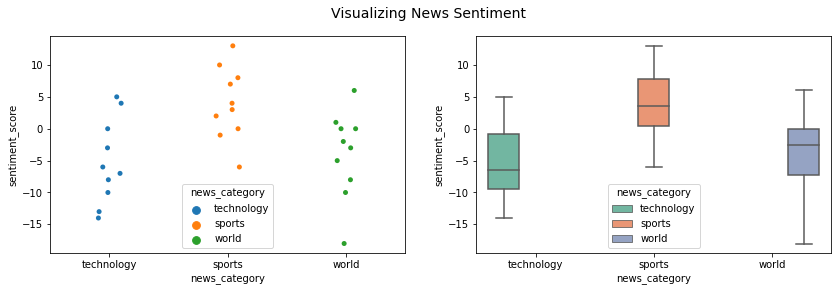

In [77]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
sp = sns.stripplot(x='news_category', y="sentiment_score",  hue='news_category', data=df, ax=ax1)
bp = sns.boxplot(x='news_category', y="sentiment_score", hue='news_category', data=df, palette="Set2", ax=ax2)
t = f.suptitle('Visualizing News Sentiment', fontsize=14)

C:\Users\shyam\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


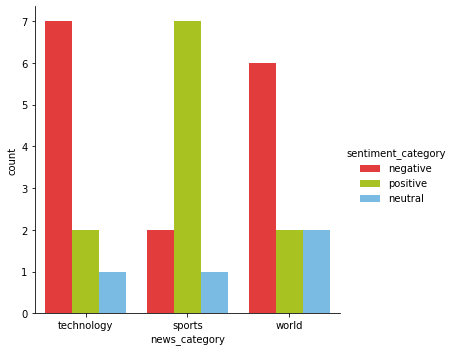

In [78]:
fc = sns.factorplot(x="news_category", hue="sentiment_category", 
                    data=df, kind="count", 
                    palette={"negative": "#FE2020", 
                             "positive": "#BADD07", 
                             "neutral": "#68BFF5"})

In [82]:
df

,news_category,sentiment_score,sentiment_category
0,technology,-3.0,negative
1,technology,-14.0,negative
2,technology,-13.0,negative
3,technology,4.0,positive
4,technology,0.0,neutral
5,technology,-7.0,negative
6,technology,5.0,positive
7,technology,-8.0,negative
8,technology,-10.0,negative
9,technology,-6.0,negative


In [84]:
df1 = df[df.news_category=='world']
pd.unique(df1.sentiment_score)

array([ -8.,   0., -18.,  -2.,  -3.,   6., -10.,   1.,  -5.])

In [86]:
from textblob import TextBlob

In [87]:
sentiment_scores_tb = [round(TextBlob(article).sentiment.polarity, 3) for article in news_df['clean_text']]

In [88]:
sentiment_category_tb = ['positive' if score > 0 
                             else 'negative' if score < 0 
                                 else 'neutral' 
                                     for score in sentiment_scores_tb]

In [89]:
df = pd.DataFrame([list(news_df['news_category']), sentiment_scores_tb, sentiment_category_tb]).T
df.columns = ['news_category', 'sentiment_score', 'sentiment_category']
df['sentiment_score'] = df.sentiment_score.astype('float')
df.groupby(by=['news_category']).describe()

sentiment_score                                            \
                        count    mean       std    min      25%     50%   
news_category                                                             
sports                   10.0  0.1796  0.218035 -0.223  0.03725  0.1930   
technology               10.0  0.0124  0.122064 -0.217 -0.06175  0.0275   
world                    10.0  0.0964  0.231718 -0.175 -0.04650  0.0415   

                              
                  75%    max  
news_category                 
sports         0.3375  0.500  
technology     0.0905  0.181  
world          0.1235  0.500

In [90]:
df.head()

,news_category,sentiment_score,sentiment_category
0,technology,0.008,positive
1,technology,0.100,positive
2,technology,0.181,positive
3,technology,0.143,positive
4,technology,-0.080,negative


C:\Users\shyam\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


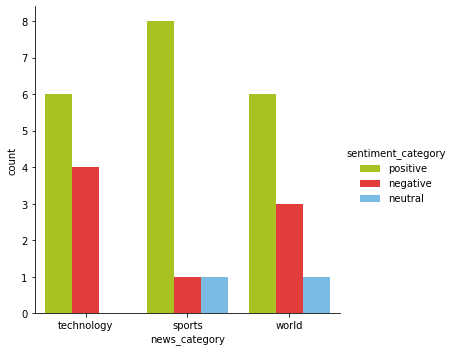

In [91]:
fc = sns.factorplot(x="news_category", hue="sentiment_category", 
                    data=df, kind="count", 
                    palette={"negative": "#FE2020", 
                             "positive": "#BADD07", 
                             "neutral": "#68BFF5"})

In [92]:
pos_idx = df[(df.news_category=='world') & (df.sentiment_score > 0.)].index[0]
neg_idx = df[(df.news_category=='world') & (df.sentiment_score < -0.)].index[0]

print('Most Negative World News Article:', news_df.iloc[neg_idx][['news_article']][0])
print()
print('Most Positive World News Article:', news_df.iloc[pos_idx][['news_article']][0])

Most Negative World News Article: An Israeli-American man named Yonatan Kedem Siman Tov, who was killed along with his wife Tamar and three young children, had texted his family before being killed by Hamas fighters during the recent attack. "They're here. They're burning us. We're suffocating," Yonatan had texted his sister. Tamar had earlier reassured her friends that they were safe.

Most Positive World News Article: Russia has asked United Nations Security Council (UNSC) to vote on a draft resolution on the Israel-Hamas conflict, seeking a ceasefire and condemning violence against civilians and all acts of terrorism. The one-page draft resolution also calls for the release of hostages, humanitarian aid access and the safe evacuation of civilians in need. The voting could take place on Monday.


In [95]:
# import model_evaluation_utils as meu
# meu.display_confusion_matrix_pretty(true_labels=sentiment_category, 
#                                     predicted_labels=sentiment_category_tb, 
#                                     classes=['negative', 'neutral', 'positive'])